In [1]:
import numpy as np
import numpy.ma as ma
import matplotlib.pyplot as plt


Load data:

In [2]:
file = "Shearwater_calls_FDR0.95_all_muts.txt" 

# get variants on x-chromosome
chrom_var = np.genfromtxt(file, skip_header=1, usecols=(0,), dtype=int,
                          missing_values="x", filling_values=-1)
xMask_var = np.isnan(chrom_var)

# get variant types
mut_var_rv = np.genfromtxt(file, skip_header=1, usecols=(2,3), dtype=str)
indelMask_var = np.array([ (len(bp[0])!=1 or len(bp[1])!=1) for bp in mut_var_rv ])

# get variants for all colonies
variants_var_col = np.genfromtxt(file,
                      skip_header=1, usecols=range(4,144), dtype=int,
                      missing_values="NA", filling_values=0)

Create masks for HSC and HPC cells

In [3]:
HSCMask_col = np.full(variants_var_col.shape[1], False)
HSCMask_col[:73] = True
HSCMask_col[140-16:140] = True
HPCMask_col = ~HSCMask_col

Calculate mutational burden and distribution among colonies

In [4]:
mutBurden_col = np.sum(variants_var_col,0)
mutSubBurden_col = np.sum(variants_var_col[~indelMask_var, :],0)
mutIndelBurden_col = np.sum(variants_var_col[indelMask_var, :],0)

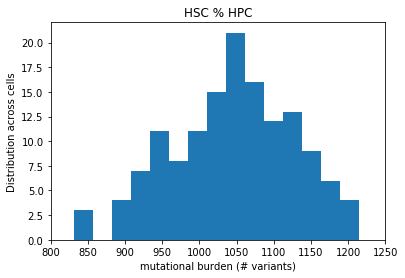

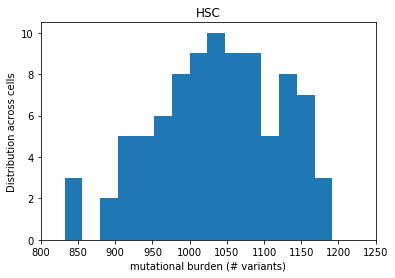

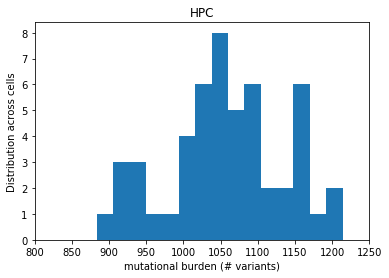

In [5]:
# plt.hist(mutSubBurden_col, bins=20)
# plt.show()
# plt.hist(mutIndelBurden_col)
# plt.show()
fig1 = plt.figure()
plt.hist(mutBurden_col, bins=15)
plt.xlabel("mutational burden (# variants)")
plt.ylabel("Distribution across cells")
plt.xlim([800, 1250])
plt.title("HSC % HPC")
plt.show()
fig1.savefig("Figures/mutburden_all.png", dpi=200)

plt.hist(mutBurden_col[HSCMask_col], bins=15)
plt.xlabel("mutational burden (# variants)")
plt.ylabel("Distribution across cells")
plt.xlim([800, 1250])
plt.title("HSC")
plt.show()

plt.hist(mutBurden_col[HPCMask_col], bins=15)
plt.xlabel("mutational burden (# variants)")
plt.ylabel("Distribution across cells")
plt.xlim([800, 1250])
plt.title("HPC")
plt.show()

Get variant allelle frequencies

In [6]:
vaf_var = np.sum(variants_var_col,1)/140
vafHSC_var = np.sum(variants_var_col[:,HSCMask_col],1) / (73+16)
vafHPC_var = np.sum(variants_var_col[:,HPCMask_col],1) / (140-16-73)

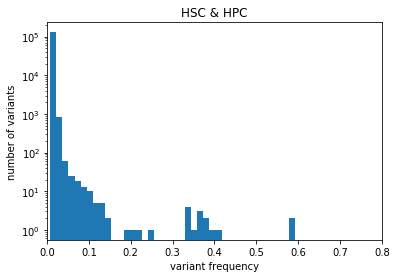

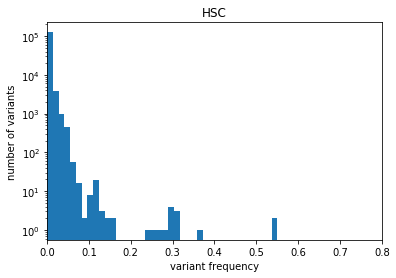

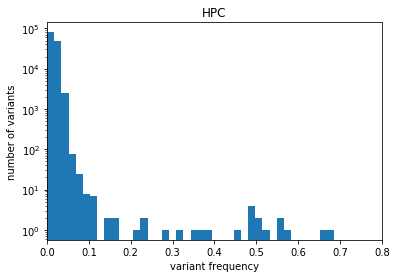

In [7]:

p1 = plt.figure()
plt.hist(vaf_var, log=True, bins=40)
plt.xlabel("variant frequency")
plt.ylabel("number of variants")
plt.title("HSC & HPC")
plt.xlim([0, 0.8])
plt.show()

p2 = plt.figure()
plt.hist(vafHSC_var, log=True, bins=40)
plt.xlabel("variant frequency")
plt.ylabel("number of variants")
plt.title("HSC")
plt.xlim([0, 0.8])
plt.show()

p3 = plt.figure()
plt.hist(vafHPC_var, log=True, bins=40)
plt.xlabel("variant frequency")
plt.ylabel("number of variants")
plt.title("HPC")
plt.xlim([0, 0.8])
plt.show()

# p1.savefig("Figures/LSdata_vaf_all.png", dpi=200)
# p2.savefig("Figures/LSdata_vaf_HSC.png", dpi=200)
# p3.savefig("Figures/LSdata_vaf_HPC.png", dpi=200)

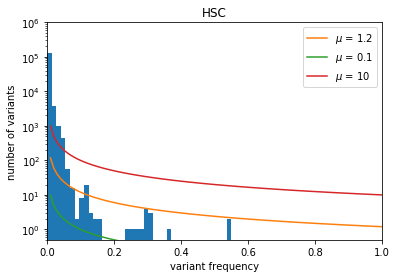

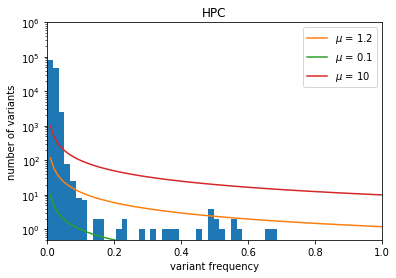

In [12]:
def equilibriumVAF(f, mu):
    return mu / f

def equilibriumGrowingVAF(f, mu):
    return mu / f**2

p1 = plt.figure()
plt.hist(vafHSC_var, log=True, bins=40)
plt.plot(np.linspace(0, 1, 100), equilibriumVAF(np.linspace(0,1,100), 1.2), label=("$\mu$ = 1.2"))
plt.plot(np.linspace(0, 1, 100), equilibriumVAF(np.linspace(0,1,100), 0.1), label=("$\mu$ = 0.1"))
plt.plot(np.linspace(0, 1, 100), equilibriumVAF(np.linspace(0,1,100), 10), label=("$\mu$ = 10"))
plt.xlabel("variant frequency")
plt.ylabel("number of variants")
plt.title("HSC")
plt.legend()
plt.xlim([0, 1])
plt.ylim([0.5, 10**6])
plt.show()

p2 = plt.figure()
plt.hist(vafHPC_var, log=True, bins=40)
plt.plot(np.linspace(0, 1, 100), equilibriumVAF(np.linspace(0,1,100), 1.2), label=("$\mu$ = 1.2"))
plt.plot(np.linspace(0, 1, 100), equilibriumVAF(np.linspace(0,1,100), 0.1), label=("$\mu$ = 0.1"))
plt.plot(np.linspace(0, 1, 100), equilibriumVAF(np.linspace(0,1,100), 10), label=("$\mu$ = 10"))
plt.xlabel("variant frequency")
plt.ylabel("number of variants")
plt.title("HPC")
plt.legend()
plt.xlim([0, 1])
plt.ylim([0.5, 10**6])
plt.show()

p1.savefig("Figures/LSdata_vaf_HSC.png", dpi=200)
p2.savefig("Figures/LSdata_vaf_HPC.png", dpi=200)

Compare VAFs to predicted equilibrium solution. Note that for mutations not on the X chromosome (in the infinite sites model) the frequency space should be rescaled to $(0, 0.5)$.
Does this still hold for this case, i.e. sequenced colonies made from single cells? --> no

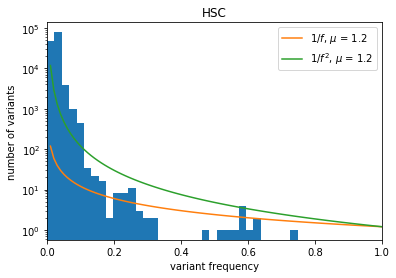

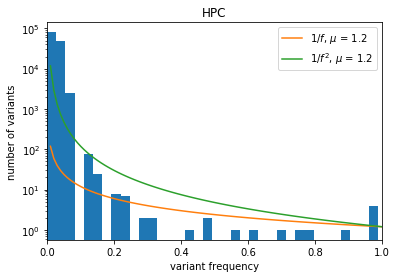

In [9]:
vafScaledNonXHSC_var = 2*vafHSC_var[~xMask_var]
vafScaledNonXHPC_var = 2*vafHPC_var[~xMask_var]

p2 = plt.figure()
plt.hist(vafScaledNonXHSC_var, log=True, bins=50)
plt.plot(np.linspace(0, 1, 100), equilibriumVAF(np.linspace(0,1,100), 1.2), label=("$1/f$, $\mu$ = 1.2"))
plt.plot(np.linspace(0, 1, 100), equilibriumGrowingVAF(np.linspace(0,1,100), 1.2), label=("$1/f^2$, $\mu$ = 1.2"))
plt.xlabel("variant frequency")
plt.ylabel("number of variants")
plt.title("HSC")
plt.legend()
plt.xlim([0, 1])
plt.show()

p2 = plt.figure()
plt.hist(vafScaledNonXHPC_var, log=True, bins=50)
plt.plot(np.linspace(0, 1, 100), equilibriumVAF(np.linspace(0,1,100), 1.2), label=("$1/f$, $\mu$ = 1.2"))
plt.plot(np.linspace(0, 1, 100), equilibriumGrowingVAF(np.linspace(0,1,100), 1.2), label=("$1/f^2$, $\mu$ = 1.2"))
plt.xlabel("variant frequency")
plt.ylabel("number of variants")
plt.title("HPC")
plt.legend()
plt.xlim([0, 1])
plt.show()